# **Business Case: Walmart**



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!wget 'https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094' -O walmart.csv

--2023-04-30 10:15:35--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 13.35.153.227, 13.35.153.45, 13.35.153.13, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|13.35.153.227|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23027994 (22M) [text/plain]
Saving to: ‘walmart.csv’

walmart.csv         100%[===================>]  21.96M  42.6MB/s    in 0.5s    

2023-04-30 10:15:36 (42.6 MB/s) - ‘walmart.csv’ saved [23027994/23027994]



### **Defining Problem Statement and Analysing basic metrics**

**Business Problem**

The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).

**Analysing basic metrics**

The company collected the transactional data of customers who purchased products from the Walmart Stores during Black Friday. The dataset has the following features:


**User_ID**:	User ID

**Product_ID**:	Product ID

**Gender**:	Sex of User

**Age**:	Age in bins

**Occupation**:	Occupation(Masked)

**City_Category**:	Category of the City (A,B,C)

**StayInCurrentCityYears**:	Number of years stay in current city

**Marital_Status**:	Marital Status

**ProductCategory**:	Product Category (Masked)

**Purchase**:	Purchase Amount


In [ ]:
#Import data
walmart = pd.read_csv('walmart.csv')
walmart

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


In [ ]:
#shape of the data
walmart.shape

(550068, 10)

In [ ]:
walmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [ ]:
#statistical summary
walmart.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


In [ ]:
walmart.describe(include='object')

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
count,550068,550068,550068,550068,550068
unique,3631,2,7,3,5
top,P00265242,M,26-35,B,1
freq,1880,414259,219587,231173,193821


## **Non-Graphical Analysis: Value counts and unique attributes**

In [1]:
#number of unique values in our data
for i in walmart.columns:
  print(i,':',walmart[i].nunique())

NameError: ignored

In [ ]:
#unique attributes 
products = walmart['Product_Category'].unique() 
products 

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9, 20, 19])

In [ ]:
#value count 
for i in walmart.columns:
  print(i,':',dict(walmart[i].value_counts()))

User_ID : {1001680: 1026, 1004277: 979, 1001941: 898, 1001181: 862, 1000889: 823, 1003618: 767, 1001150: 752, 1001015: 740, 1005795: 729, 1005831: 727, 1002909: 718, 1001449: 714, 1002063: 709, 1004344: 705, 1003391: 698, 1003841: 698, 1000424: 694, 1004510: 691, 1001980: 685, 1001088: 680, 1004227: 676, 1003808: 671, 1004508: 651, 1000549: 632, 1003224: 622, 1003539: 617, 1005367: 612, 1001285: 606, 1004543: 588, 1003824: 584, 1001010: 575, 1004448: 575, 1005643: 573, 1000752: 572, 1001448: 570, 1003032: 568, 1004447: 560, 1000678: 559, 1004064: 558, 1001605: 558, 1000524: 558, 1005954: 557, 1000550: 549, 1001912: 549, 1003526: 547, 1004725: 544, 1002116: 538, 1003311: 537, 1003778: 533, 1001447: 533, 1003507: 530, 1001880: 529, 1000881: 527, 1004808: 524, 1001019: 517, 1006036: 514, 1006016: 504, 1003292: 502, 1004425: 501, 1000710: 500, 1005812: 499, 1004647: 499, 1004979: 498, 1000869: 497, 1002106: 497, 1004312: 496, 1002820: 495, 1005046: 494, 1002304: 494, 1001647: 493, 1003675:

In [ ]:
#checking null values in every column of our data
walmart.isnull().sum() #There are no NaN values

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

## **Visual Analysis**

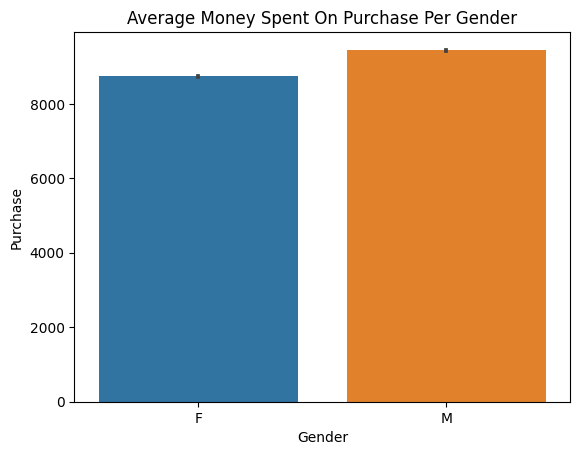

In [ ]:
sns.barplot(data=walmart,x='Gender',y='Purchase',estimator=np.mean)
plt.title("Average Money Spent On Purchase Per Gender")
plt.show()

In [ ]:
male_mean_purchase=walmart.loc[walmart['Gender']=='M','Purchase'].mean()
female_mean_purchase=walmart.loc[walmart['Gender']=='F','Purchase'].mean()
print('Avg money spent per Male - ', round(male_mean_purchase,2))
print('Avg money spent per Female - ',round(female_mean_purchase,2))

Avg money spent per Male -  9437.53
Avg money spent per Female -  8734.57


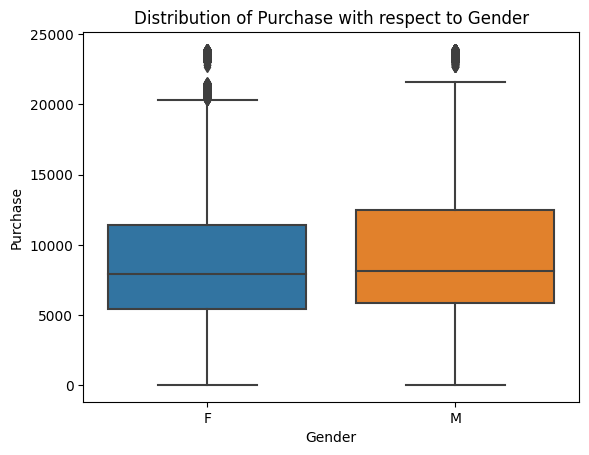

In [ ]:
sns.boxplot(data=walmart,y='Purchase',x='Gender')
plt.title('Distribution of Purchase with respect to Gender')
plt.show()

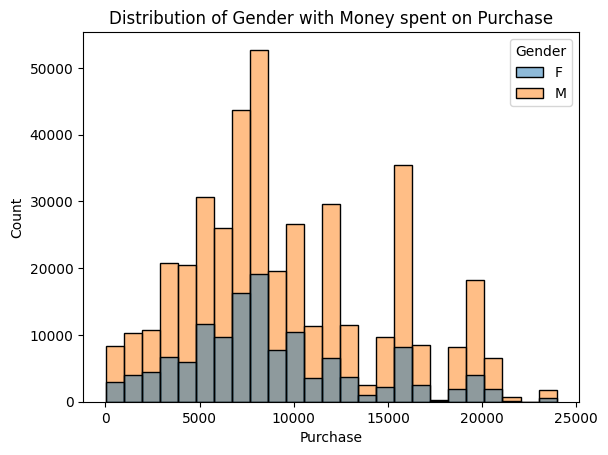

In [ ]:
sns.histplot(data=walmart,x='Purchase',hue='Gender',bins=25)
plt.title("Distribution of Gender with Money spent on Purchase")
plt.show()

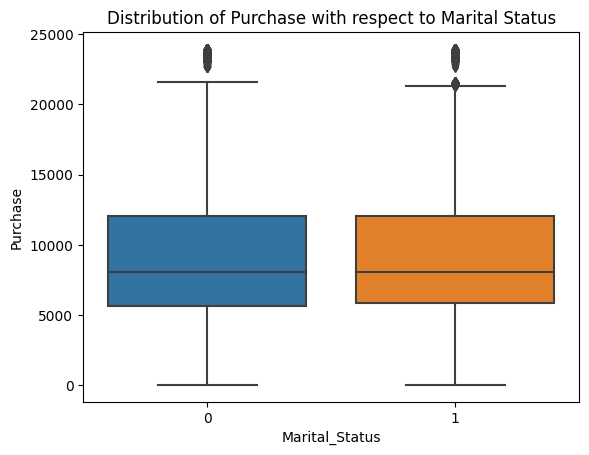

In [ ]:
sns.boxplot(data=walmart,y='Purchase',x='Marital_Status')
plt.title('Distribution of Purchase with respect to Marital Status')
plt.show()

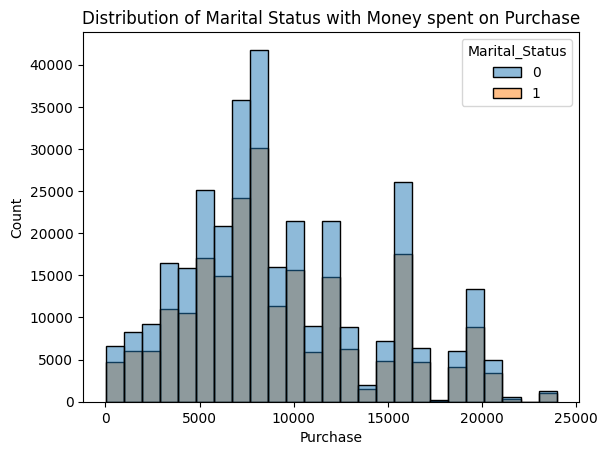

In [ ]:
sns.histplot(data=walmart,x='Purchase',hue='Marital_Status',bins=25)
plt.title("Distribution of Marital Status with Money spent on Purchase")
plt.show()

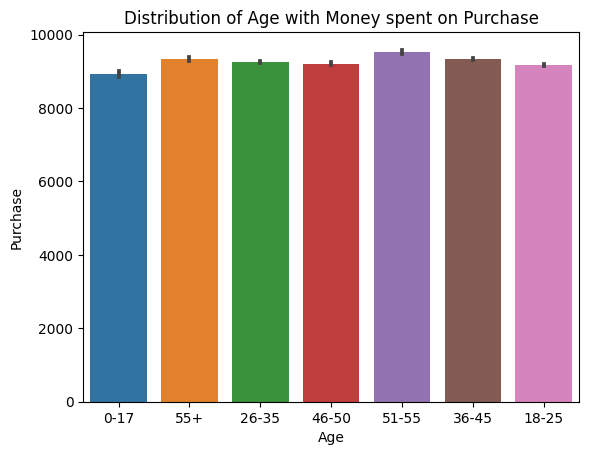

In [ ]:
sns.barplot(data=walmart,x='Age',y='Purchase')
plt.title("Distribution of Age with Money spent on Purchase")
plt.show()

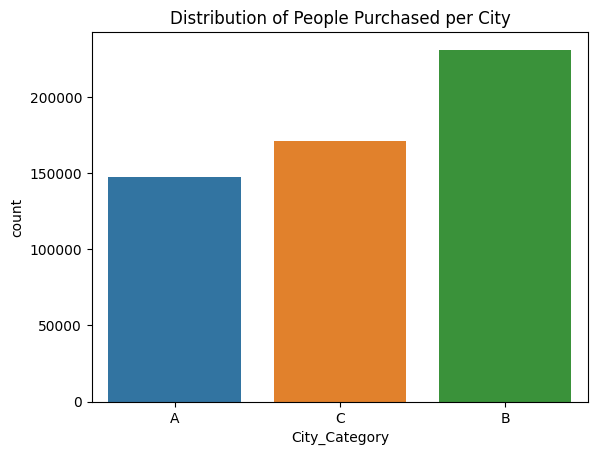

In [ ]:
sns.countplot(data=walmart,x='City_Category')
plt.title("Distribution of People Purchased per City")
plt.show()

## **Outlier Detection** 

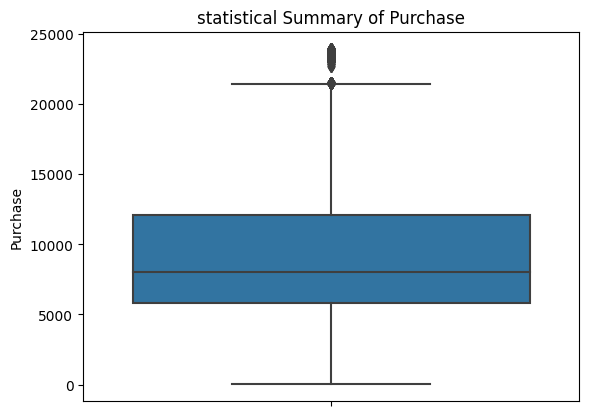

In [ ]:
#Outlier Detection
sns.boxplot(data=walmart,y='Purchase')
plt.title('statistical Summary of Purchase')
plt.show()

From the above chart, 

**Purchase**:
  
    Above 21000 is considered outliers

## **Avg Money Spent With Respect to Gender**

In [ ]:
sample_male_mean=[]
for i in range(1000):
  sample_mean = walmart.loc[walmart['Gender']=='M','Purchase'].sample(300).mean()
  sample_male_mean.append(sample_mean)

np.mean(sample_male_mean)

9420.64084

<Axes: ylabel='Density'>

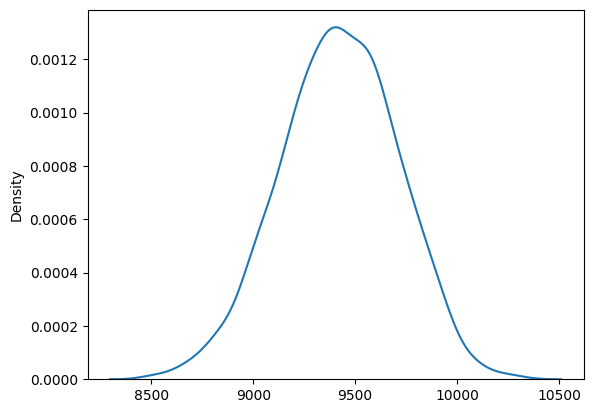

In [ ]:
sns.kdeplot(sample_male_mean)


In [ ]:
sample_female_mean=[]
for i in range(1000):
  sample_mean = walmart.loc[walmart['Gender']=='F','Purchase'].sample(300).mean()
  sample_female_mean.append(sample_mean)

np.mean(sample_female_mean)

8738.502110000001

<Axes: ylabel='Density'>

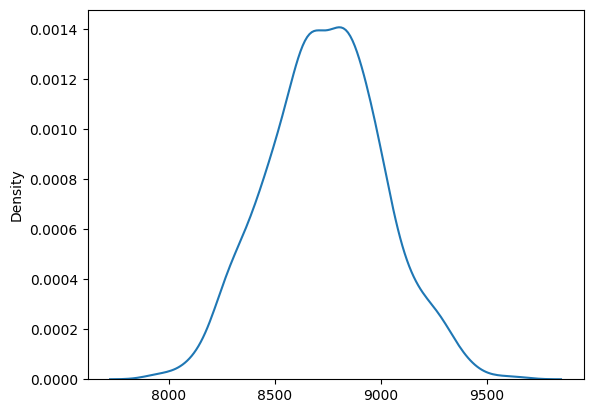

In [ ]:
sns.kdeplot(sample_female_mean)

In [ ]:
walmart.groupby(['Gender'])['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,135809.0,8734.565765,4767.233289,12.0,5433.0,7914.0,11400.0,23959.0
M,414259.0,9437.526040,5092.186210,12.0,5863.0,8098.0,12454.0,23961.0


### **Average Money Spent on Purchase (Male) - Confidence Interval**

In [ ]:
#confident level - 95%
[np.mean(sample_male_mean) - 1.96 * (np.std(sample_male_mean) /np.sqrt(1000)),np.mean(sample_male_mean) + 1.96 * (np.std(sample_male_mean) /np.sqrt(1000))]

[9402.916823552301, 9438.364856447699]

In [ ]:
#confident level - 99%
[np.mean(sample_male_mean) - 2.57 * (np.std(sample_male_mean) /np.sqrt(1000)),np.mean(sample_male_mean) + 2.57 * (np.std(sample_male_mean) /np.sqrt(1000))]

[9397.400675576231, 9443.881004423769]

### **Average Money Spent on Purchase (Female) - Confidence Interval**

In [ ]:
#confident level - 95%
[np.mean(sample_female_mean) - 1.96 * (np.std(sample_female_mean) /np.sqrt(1000)),np.mean(sample_female_mean) + 1.96 * (np.std(sample_female_mean) /np.sqrt(1000))]

[8721.744743828272, 8755.25947617173]

In [ ]:
#confident level - 99%
[np.mean(sample_female_mean) - 2.57 * (np.std(sample_female_mean) /np.sqrt(1000)),np.mean(sample_female_mean) + 2.57 * (np.std(sample_female_mean) /np.sqrt(1000))]

[8716.529441091152, 8760.47477890885]

## **Avg Money Spent With Respect to Marital Status**

In [ ]:
walmart.groupby(['Marital_Status'])['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Marital_Status,,,,,,,,
0,324731.0,9265.907619,5027.347859,12.0,5605.0,8044.0,12061.0,23961.0
1,225337.0,9261.174574,5016.897378,12.0,5843.0,8051.0,12042.0,23961.0


In [ ]:
sample_unmarried_mean=[]
for i in range(1000):
  sample_mean = walmart.loc[walmart['Marital_Status']==0,'Purchase'].sample(300).mean()
  sample_unmarried_mean.append(sample_mean)

np.mean(sample_unmarried_mean)

9268.159583333332

In [ ]:
sample_married_mean=[]
for i in range(1000):
  sample_mean = walmart.loc[walmart['Marital_Status']==1,'Purchase'].sample(300).mean()
  sample_married_mean.append(sample_mean)

np.mean(sample_married_mean)

9274.567983333334

### **Average Money Spent on Purchase (Unmarried) - Confidence Interval**

In [ ]:
#confident level - 95%
[np.mean(sample_unmarried_mean) - 1.96 * (np.std(sample_unmarried_mean) /np.sqrt(1000)),np.mean(sample_unmarried_mean) + 1.96 * (np.std(sample_unmarried_mean) /np.sqrt(1000))]

[9249.875738498942, 9286.443428167722]

In [ ]:
#confident level - 99%
[np.mean(sample_unmarried_mean) - 2.57 * (np.std(sample_unmarried_mean) /np.sqrt(1000)),np.mean(sample_unmarried_mean) + 2.57 * (np.std(sample_unmarried_mean) /np.sqrt(1000))]

[9244.18535821885, 9292.133808447814]

### **Average Money Spent on Purchase (Married) - Confidence Interval**

In [ ]:
#confident level - 95%
[np.mean(sample_married_mean) - 1.96 * (np.std(sample_married_mean) /np.sqrt(1000)),np.mean(sample_married_mean) + 1.96 * (np.std(sample_married_mean) /np.sqrt(1000))]

[9256.040167604373, 9293.095799062296]

In [ ]:
#confident level - 99%
[np.mean(sample_married_mean) - 2.57 * (np.std(sample_married_mean) /np.sqrt(1000)),np.mean(sample_married_mean) + 2.57 * (np.std(sample_married_mean) /np.sqrt(1000))]

[9250.273857607095, 9298.862109059573]

### **Avg Money Spent With Respect to Age**

In [ ]:
walmart.groupby(['Age'])['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Age,,,,,,,,
0-17,15102.0,8933.464640,5111.114046,12.0,5328.0,7986.0,11874.0,23955.0
18-25,99660.0,9169.663606,5034.321997,12.0,5415.0,8027.0,12028.0,23958.0
26-35,219587.0,9252.690633,5010.527303,12.0,5475.0,8030.0,12047.0,23961.0
36-45,110013.0,9331.350695,5022.923879,12.0,5876.0,8061.0,12107.0,23960.0
46-50,45701.0,9208.625697,4967.216367,12.0,5888.0,8036.0,11997.0,23960.0
51-55,38501.0,9534.808031,5087.368080,12.0,6017.0,8130.0,12462.0,23960.0
55+,21504.0,9336.280459,5011.493996,12.0,6018.0,8105.5,11932.0,23960.0


In [ ]:
sample_age_0_17_mean=[]
for i in range(1000):
  sample_mean = walmart.loc[walmart['Age']== '0-17','Purchase'].sample(300).mean()
  sample_age_0_17_mean.append(sample_mean)

np.mean(sample_age_0_17_mean)

8925.319536666668

In [ ]:
sample_age_18_25_mean=[]
for i in range(1000):
  sample_mean = walmart.loc[walmart['Age']== '18-25','Purchase'].sample(300).mean()
  sample_age_18_25_mean.append(sample_mean)

np.mean(sample_age_18_25_mean)

9160.52455

In [ ]:
sample_age_26_45_mean=[]
for i in range(1000):
  sample_mean = walmart.loc[walmart['Age'].isin(['26-35','36-45']) ,'Purchase'].sample(300).mean()
  sample_age_26_45_mean.append(sample_mean)

np.mean(sample_age_26_45_mean)

9273.254439999999

In [ ]:
sample_age_greater_than_46_mean=[]
for i in range(1000):
  sample_mean = walmart.loc[walmart['Age'].isin(['51-55','46-50','51-55','55+']),'Purchase'].sample(300).mean()
  sample_age_greater_than_46_mean.append(sample_mean)

np.mean(sample_age_greater_than_46_mean)

9357.479246666666

### **Average Money Spent on Purchase With Respect to Age - 95% Confidence Interval**

In [ ]:
#Age - (0 - 17)
[np.mean(sample_age_0_17_mean) - 1.96 * (np.std(sample_age_0_17_mean) /np.sqrt(1000)),np.mean(sample_age_0_17_mean) + 1.96 * (np.std(sample_age_0_17_mean) /np.sqrt(1000))]

[8906.770811046392, 8943.868262286944]

In [ ]:
#Age - (18 - 25)
[np.mean(sample_age_18_25_mean) - 1.96 * (np.std(sample_age_18_25_mean) /np.sqrt(1000)),np.mean(sample_age_18_25_mean) + 1.96 * (np.std(sample_age_18_25_mean) /np.sqrt(1000))]

[9143.42243248712, 9177.62666751288]

In [ ]:
#Age - (26 -  45)
[np.mean(sample_age_26_45_mean) - 1.96 * (np.std(sample_age_26_45_mean) /np.sqrt(1000)),np.mean(sample_age_26_45_mean) + 1.96 * (np.std(sample_age_26_45_mean) /np.sqrt(1000))]

[9254.90089809436, 9291.607981905638]

In [ ]:
#Age - ( > 45)
[np.mean(sample_age_greater_than_46_mean) - 1.96 * (np.std(sample_age_greater_than_46_mean) /np.sqrt(1000)),np.mean(sample_age_greater_than_46_mean) + 1.96 * (np.std(sample_age_greater_than_46_mean) /np.sqrt(1000))]

[9339.16556085745, 9375.792932475882]

## **Business Insights**



1.   The dataset contains **550068** records and **10** features. 
2.   After examination, we can see that dataset doesn't have any missing values.
3.   Outliers were detected for purchase column using boxplot and they were handled to avoid high variation within the data points.
4.  Using barplot, we can see the mean purchase of both the genders. Male purchased average is higher than female.
5.  Using the same procedure, we got the distribution among martial status and money spent on each purchase.
6.  Distribution between age and purchase also been visualized. The age above 45 shows high in purchase than the other age group.
7.  From the distribution between city and purchase made, we can clearly that people in **city B** made more purchase than the other two cities.
8. The average purchase for male is 9500 which has the count of around 50000 and for female,the count around 19000.
1.   On **95%** confidence level, Male average money spent on purchase ranges between 9402 and 9438 and female average ranges 8721 and 8755, which clearly shows that **male spend more money** on purchase than female. 
2.   On **99%** confidence level, Male average money spent on purchase ranges between 9397 and 9443 and female average ranges 8716 and 8760, which clearly shows that **male spend more money** on purchase than female. 
3.   On **99%** confidence level, Married and Unmarried people have overlapping range on money spent on purchase, but unmarried people spend more money on purchase than the married people.
4. With respect to age, there is no significant difference between average money spent on purchase, but age above 45 have high purchase count than the other age group.
5.  City B has more purchase count which is above 2,00,000 and it is advised to provide more sales in that city.


## **Recommendations**



1.  From our analysis, we can see that male spent more money than females. So we can focus on selling the high-end products to males since there is high probability of them buying it.
2.  To increase our female customer count, we can introduce new offers and discount exclusive to females.
3.  Since city B has high purchase rate, we can introduce the best selling product in city B to other cities.
4.  Customers between the age 51-55 tend to purchase the most. So we can focus more on that age category to increase sales.
5.  Age with 46-50 doesn't have any male customers, so we can provide some offers exclusive to males  under that category to encourage new customers



